# Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Abre el archivo de datos y estudia la información general 

Importa las librerias necesarias


In [126]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from IPython.display import display
from scipy.stats import ttest_ind

# Ruta de archivo:

In [127]:
df_game = pd.read_csv('games.csv')
display(df_game.head(20))
print('_____________________________________________________')
display(df_game.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


_____________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

# Paso 2. Prepara los datos

-2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

-2.2 Convierte los datos en los tipos necesarios.

-2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

-2.4 Si es necesario, elige la manera de tratar los valores ausentes:

        -2.4.1 Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
        -2.4.2 ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
        -2.4.3 Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

-2.5 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

# 2.1 Remplaza los nombres de las columnas

In [128]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
df_game.columns = df_game.columns.str.lower()
display(df_game.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# 2.2 Combierte los datos en tipos necesarios

In [129]:
#Convierte los datos en los tipos necesarios.

# Limpiar la columna 'user_score'
df_game['user_score'] = pd.to_numeric(df_game['user_score'], errors='coerce')

# Convertir las columnas a tipo float
df_game['user_score'] = df_game['user_score'].astype(float)
display(df_game.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

# 2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

En esta sección de código, estamos actualizando los tipos de datos de dos columnas específicas en nuestro conjunto de datos. La columna 'user_score', previamente almacenada como objeto, ha sido transformada a float, ya que contiene valores numéricos decimales.

Esta modificación es fundamental para facilitar futuros análisis de datos, permitiéndonos manipular la información de manera más efectiva. Sin embargo, durante el proceso de conversión, fue necesario realizar una depuración adicional del código en estas columnas. La naturaleza de los datos presentes no permitía una conversión directa, por lo que fue necesario abordar estos casos de manera específica.

# 2.4 Revisión de valores ausentes.
    -2.4.1 Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

In [130]:
# Aqui estamos sacando el porsentaje de valores NAN en cada columna
100*df_game.isna().sum()/df_game.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

# 2.4.2 ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
En esta instancia, he tomado la determinación de no modificar los datos existentes. Esta decisión se basa en una serie de consideraciones fundamentales. En primer lugar, la cantidad considerable de valores ausentes en las columnas 'critic_score', 'user_code' y 'rating', que superan el 40%, sugiere que cualquier método de imputación podría introducir sesgos en el conjunto de datos.

Además, es esencial tener en cuenta el posible impacto en el análisis resultante. La distorsión potencial en los resultados podría ser significativa, especialmente debido a la naturaleza sustancial de los datos faltantes en relación con el conjunto de datos en su totalidad.

Por lo tanto, con el fin de mantener la integridad y la precisión de nuestros resultados, he optado por preservar los datos existentes en su estado actual. Esto garantiza una representación fiel de la información disponible, así como la transparencia y la precisión en el análisis subsiguiente.

# 2.4.3 Revisión valores 'tbd'

In [131]:
# Aqui estamos utilisando unique para obtener los valores únicos presentes en la columna 'user_score' 
df_game.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [132]:
# En esta parte estamos cambiando los valores 'tbd' a valores NAN
df_game['user_score'] = df_game['user_score'].replace('tbd', np.nan)
# Aqui estamos conbirtiendo de nuevo la columna 'user_score' a tipo de dato float
df_game['user_score'] = df_game['user_score'].astype(float)
df_game.user_score.unique()


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Aquí estamos llevando a cabo la conversión de los valores 'TBD' a valores NaN (Not a Number), ya que ambos representan una ausencia de datos. Opté por esta transformación a NaN, dado que esta representación nos facilitará la manipulación de datos en futuros análisis. La uniformidad en la codificación de valores faltantes contribuirá a una gestión más coherente y eficiente de los datos, lo que promueve la precisión y fiabilidad en nuestras operaciones analíticas.

# 2.5 Calcula las ventas totales

In [133]:
# Visualisamos las colunmas del Dataframe
df_game.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [134]:
# Con este codigo estamos sumando todas las ventas de cada pais, sumandolas y creando una nueva columna llamada 'sales_all'
df_game['sales_all'] = df_game['na_sales'] + df_game['eu_sales'] + df_game['jp_sales'] + df_game['other_sales']

In [135]:
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Paso 3. Analiza los datos
3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

3.4 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

3.5 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

3.6 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

3.7 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?Describe tus hallazgos.

3.8 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

3.9 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

3.10 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?.

# 3.1 Juegos lanzados en diferentes años.


In [136]:
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [137]:
# Con este codigo estamos agrupando la columna 'year_of_release' y contando los videojuegos de la columna 'name'
count_games =  df_game.groupby('year_of_release')['name'].count()
display(count_games.head())

year_of_release
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: name, dtype: int64

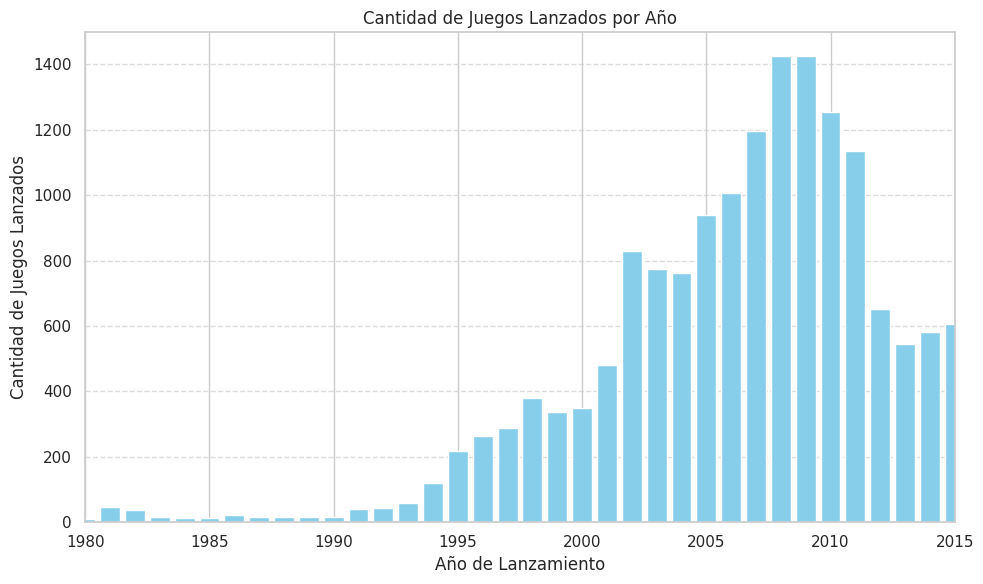

In [138]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(count_games.index, count_games.values, color='skyblue')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.title('Cantidad de Juegos Lanzados por Año')

plt.xlim(1980, 2015)

plt.xticks(range(1980, 2016, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En el gráfico, se observa un notable sesgo en el lado izquierdo, donde los años comprendidos entre 1980 y 1993 muestran una escasa cantidad de ventas de videojuegos. Sin embargo, a partir de 1995, se observa un marcado aumento en las ventas, alcanzando su punto máximo alrededor de 2010. Posteriormente, se evidencia un descenso gradual hasta el año 2015.

# 3.2 Ventas por plataforma

In [139]:
display(df_game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [140]:
# Con  este codigo estamos creando una tabla dinamica 
sales_by_console = df_game.pivot_table(index='platform', values='sales_all', aggfunc='sum')
display(sales_by_console.sort_values(by='sales_all', ascending=False).head())

,sales_all
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [141]:
# Con estos codigos estamos creando un nuevo dataframe llamado platform_distribution y estamos agrupandole las columnas 'year_of_release' y 'platform' junto con su suma total de ventas
platform_list = ('PS2', 'X360', 'PS3', 'Wii', 'DS')
games = df_game[df_game['platform'].isin(platform_list)]

platform_distribution = games.groupby(['year_of_release', 'platform'])['sales_all'].sum().reset_index()

platform_distribution.head()

,year_of_release,platform,sales_all
0,1985.0,DS,0.02
1,2000.0,PS2,39.17
2,2001.0,PS2,166.43
3,2002.0,PS2,205.38
4,2003.0,PS2,184.31


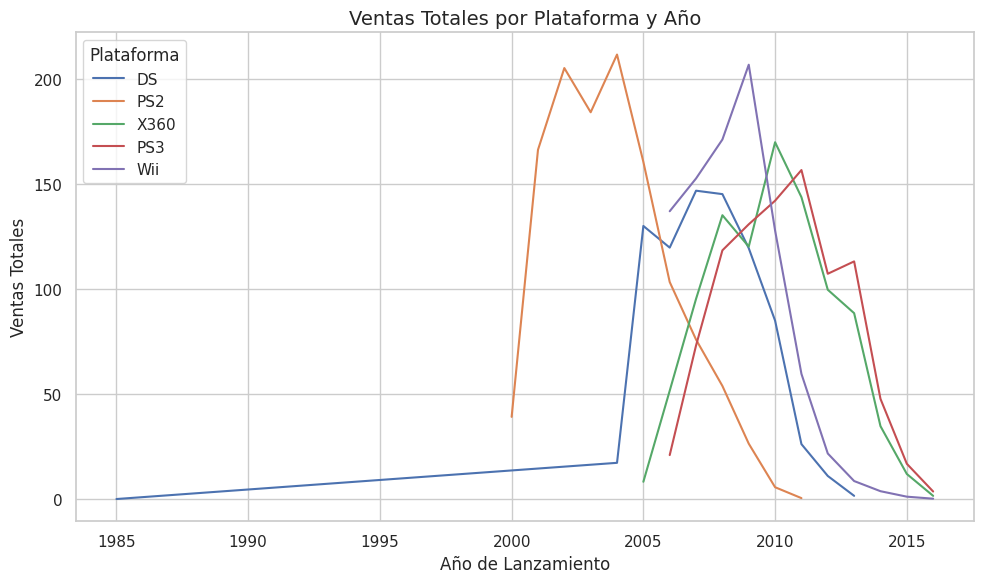

In [142]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=platform_distribution, hue='platform', x='year_of_release', y='sales_all')

# Configurar los ejes y etiquetas
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.title('Ventas Totales por Plataforma y Año', fontsize=14)

# Ajustar la leyenda
plt.legend(title='Plataforma', loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

El análisis del cuadro revela patrones significativos en el desempeño de diferentes consolas de videojuegos a lo largo del tiempo:

    En primer lugar, la PlayStation 2 (PS2) experimentó un notable auge desde su lanzamiento en 2000 hasta 2004, seguido de una marcada disminución hasta 2010.

    Por otro lado, la Xbox 360 mostró un ascenso gradual desde su introducción en 2005, alcanzando su punto más alto en 2010 antes de iniciar un declive hasta 2015.

    La Nintendo DS, siendo una de las primeras en el mercado, exhibió un crecimiento moderado hasta 2004, momento en el que sus ventas se incrementaron notablemente, llegando al máximo en 2008.

    La PlayStation 3 (PS3), lanzada en 2006, alcanzó su punto álgido en 2011 antes de experimentar un descenso hasta 2015.

    La Wii, lanzada en 2005 con ventas iniciales robustas, experimentó un declive continuo hasta 2015.

En conclusión, observamos que todas las consolas tienden a alcanzar su punto máximo de ventas en un determinado lapso de tiempo, pero luego experimentan un declive en la segunda mitad de su ciclo de vida. Para obtener una comprensión más precisa, se recomienda considerar un promedio de ventas a lo largo de períodos de cinco años. Es importante destacar que el análisis de datos más significativos abarca desde el año 2000 en adelante.

# 3.6 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.


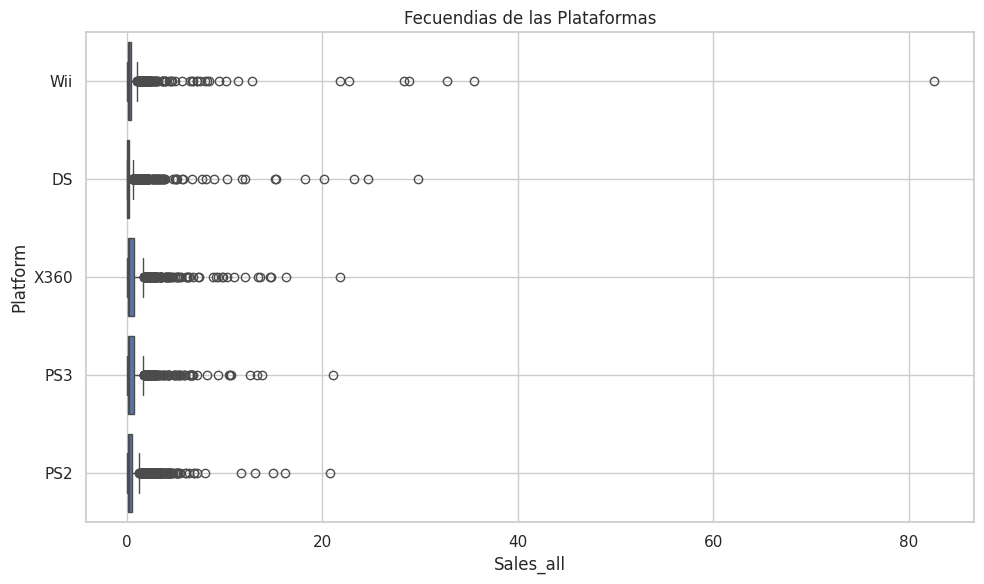

In [143]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=games, x= 'sales_all', y = 'platform')

# Configurar el título del gráfico
plt.title('Fecuendias de las Plataformas')

# Configurar los ejes y etiquetas
plt.xlabel('Sales_all')
plt.ylabel('Platform')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

En esta sección, los diagramas de caja no proporcionan información relevante más allá de la presencia de numerosos valores atípicos en los datos. Por consiguiente, nuestra estrategia será eliminar dichos valores atípicos.

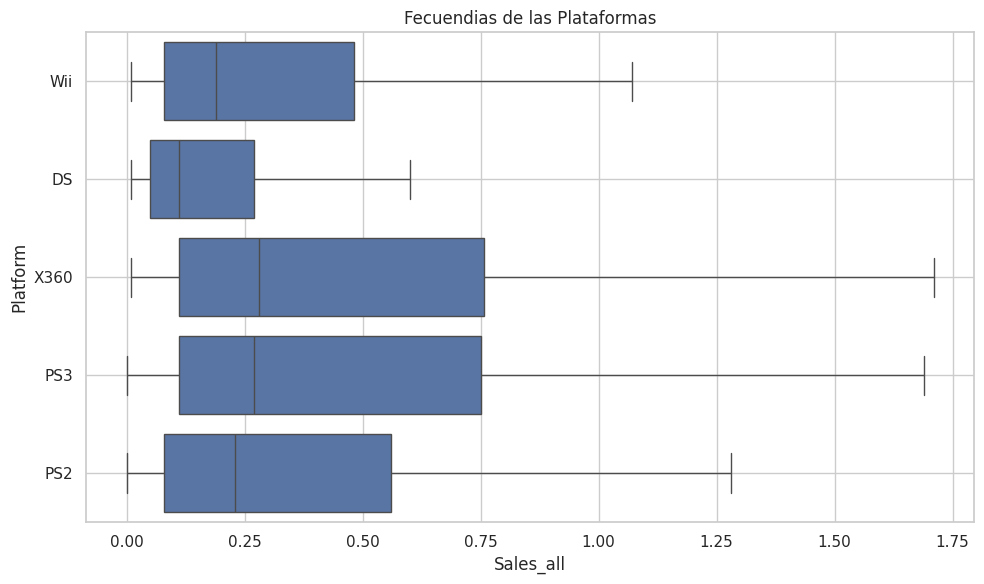

In [144]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=games, x= 'sales_all', y = 'platform', showfliers=False)

# Configurar el título del gráfico
plt.title('Fecuendias de las Plataformas')

# Configurar los ejes y etiquetas
plt.xlabel('Sales_all')
plt.ylabel('Platform')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

Lo que podemos observar en estos cinco diagramas de caja es que la media de las ventas de la plataforma DS está notablemente rezagada en comparación con las demás plataformas. Asimismo, se aprecia una marcada disparidad en las medianas de las plataformas, exceptuando a las de X360 y PS3, donde se observa una conducta similar.

# 3.8 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [145]:
# Lo que hacemos en este codigo es crear un cuadro en el que mustre las columnas de critic_score	platform	year_of_release
popular_df = games[['critic_score', 'platform', 'year_of_release']].copy()
popular_df_ps2 = popular_df[popular_df['platform'] == 'PS2']
popular_df_ps2

,critic_score,platform,year_of_release
17,95.0,PS2,2004.0
24,95.0,PS2,2002.0
28,95.0,PS2,2001.0
38,97.0,PS2,2001.0
48,89.0,PS2,2004.0
...,...,...,...
16670,NaN,PS2,2008.0
16671,NaN,PS2,2008.0
16683,NaN,PS2,2008.0
16689,NaN,PS2,2008.0


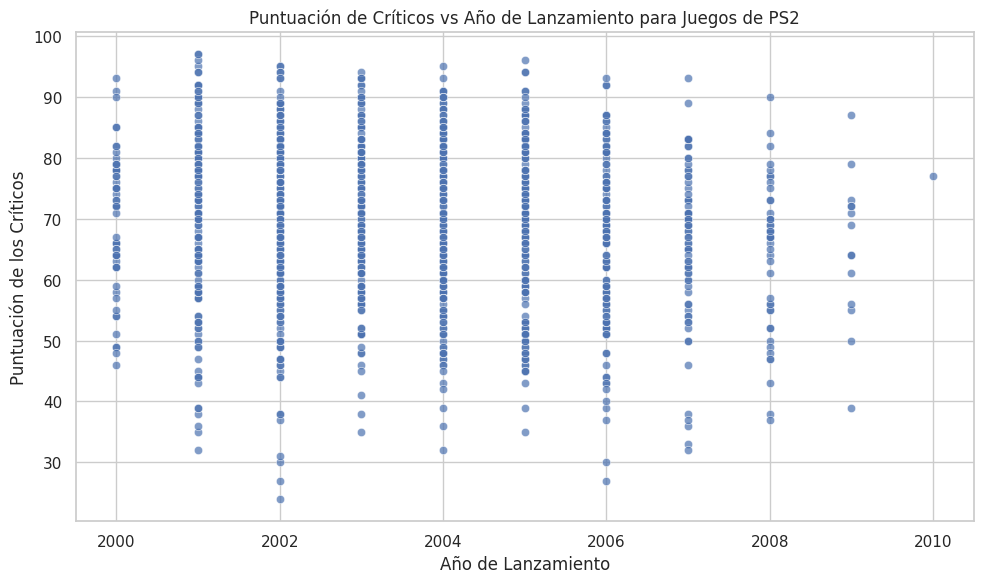

In [146]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=popular_df_ps2, x='year_of_release', y='critic_score', alpha=0.7)

# Configurar el título del gráfico
plt.title('Puntuación de Críticos vs Año de Lanzamiento para Juegos de PS2')

# Configurar los ejes y etiquetas
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Puntuación de los Críticos')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

La cantidad limitada de años representados en este gráfico, junto con la densidad de datos, dificulta su interpretación efectiva. Para mejorar la comprensión del comportamiento de los datos, consideraremos la utilización de un gráfico de líneas en lugar de un gráfico de dispersión, lo que nos permitirá una visualización más clara y detallada de la tendencia a lo largo del tiempo

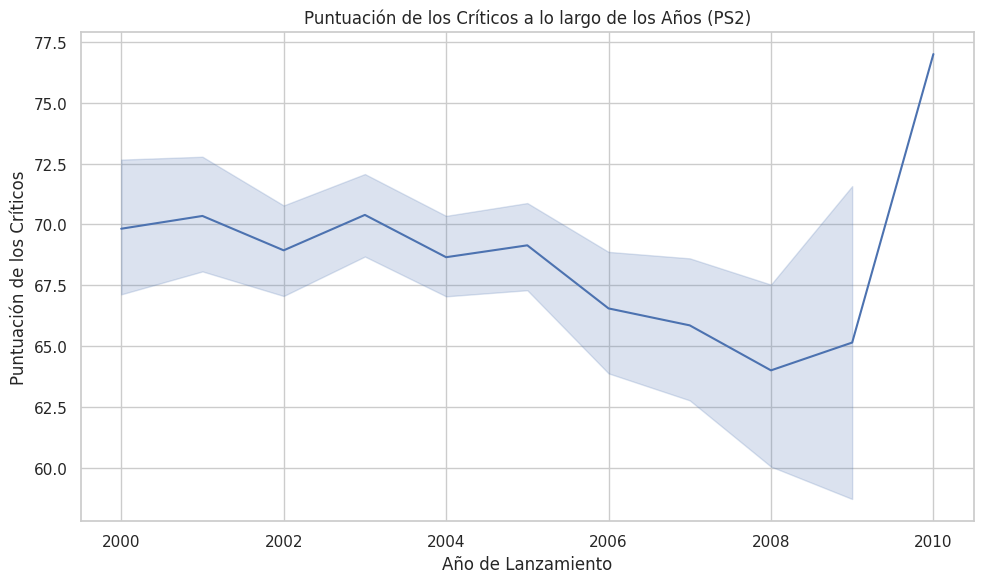

In [147]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=popular_df_ps2, x='year_of_release', y='critic_score')

# Configurar el título del gráfico
plt.title('Puntuación de los Críticos a lo largo de los Años (PS2)')

# Configurar los ejes y etiquetas
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Puntuación de los Críticos')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

Este diagrama ilustra la evolución de la puntuación de los Críticos a lo largo de los años para la plataforma PS2. Observamos un declive en las calificaciones durante el período entre 2000 y 2009, manteniéndose en un rango de 63 a 72. Sin embargo, hacia el año 2009, se registra un notable aumento, alcanzando cifras superiores a las previamente registradas. Para ofrecer una conclusión más sólida, sería beneficioso contar con datos adicionales de al menos cinco años más.

# 3.10 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?.

In [148]:
# Creamos un Nuevo dataframe llamado genre_df que contenga las columnas 'name','genre','platform', 'year_of_release', 'sales_all'
genre_df = games[[ 'name','genre','platform', 'year_of_release', 'sales_all']].copy()
genre_df

,name,genre,platform,year_of_release,sales_all
0,Wii Sports,Sports,Wii,2006.0,82.54
2,Mario Kart Wii,Racing,Wii,2008.0,35.52
3,Wii Sports Resort,Sports,Wii,2009.0,32.77
6,New Super Mario Bros.,Platform,DS,2006.0,29.80
7,Wii Play,Misc,Wii,2006.0,28.91
...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,Sports,DS,2009.0,0.01
16704,Plushees,Simulation,DS,2008.0,0.01
16709,SCORE International Baja 1000: The Official Game,Racing,PS2,2008.0,0.00
16710,Samurai Warriors: Sanada Maru,Action,PS3,2016.0,0.01


<Axes: xlabel='genre', ylabel='sales_all'>

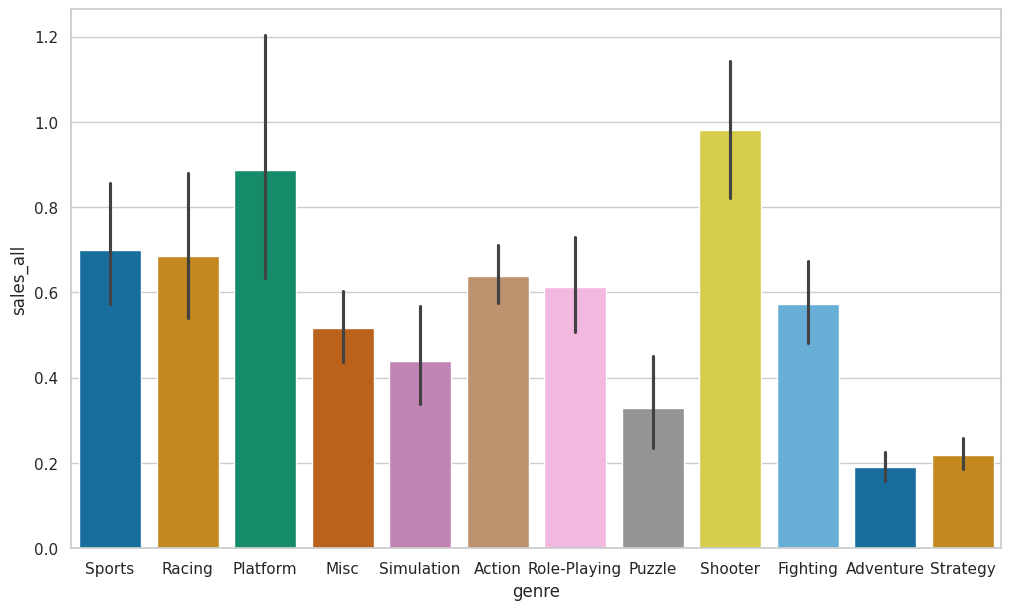

In [149]:
# Imprime un grafico de barras
plt.figure(figsize=(12, 7))
sns.barplot(data=genre_df, x='genre', y='sales_all', hue='genre', palette='colorblind', legend=False)


Basándonos en el análisis del gráfico, podemos concluir que los géneros más rentables en términos de ventas son Platform y Shooter, ya que ocupan las posiciones más altas en la gráfica. Por otro lado, los géneros menos rentables parecen ser Adventure y Strategy, ya que se encuentran en las posiciones más bajas en el gráfico. Estos hallazgos nos proporcionan información valiosa sobre las preferencias de los consumidores y las tendencias de mercado en la industria de los videojuegos

# Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

        -4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

        -4.2 Los cinco géneros principales. Explica la diferencia.

        -4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


# 4.1 Plataformas principales

In [150]:
#Creamos un df llamado marquet_sales y agrupamos las columnas platform y na_sales	jp_sale
market_sales =  games.groupby('platform').agg({'na_sales': 'sum',
                                               'jp_sales':'sum'}).reset_index()
market_sales

,platform,na_sales,jp_sales
0,DS,382.40,175.57
1,PS2,583.84,139.20
2,PS3,393.49,80.19
3,Wii,496.90,69.33
4,X360,602.47,12.43


In [151]:
# Convertimos la columnas market en las ventas de na_sales y jp_sales, y en sales sus ventas numericas 
market_sales = pd.melt(market_sales, id_vars = ['platform'], value_vars = ['na_sales', 'jp_sales'], var_name = 'market', value_name = 'sales')
market_sales

,platform,market,sales
0,DS,na_sales,382.40
1,PS2,na_sales,583.84
2,PS3,na_sales,393.49
3,Wii,na_sales,496.90
4,X360,na_sales,602.47
5,DS,jp_sales,175.57
6,PS2,jp_sales,139.20
7,PS3,jp_sales,80.19
8,Wii,jp_sales,69.33
9,X360,jp_sales,12.43


<Axes: xlabel='market', ylabel='sales'>

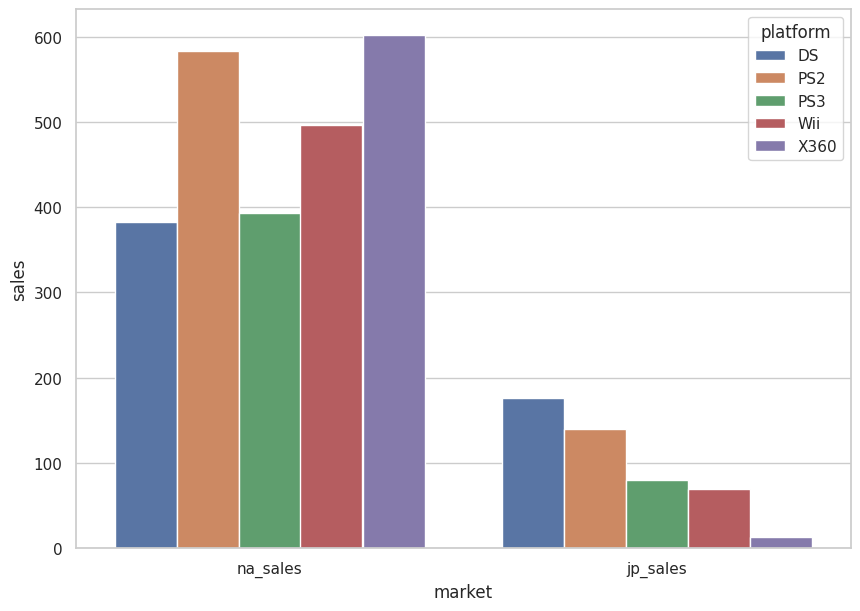

In [152]:
# Creamos un grafico de barras con el df market_sales
plt.figure(figsize=(10, 7))
sns.barplot(market_sales, x='market', y='sales', hue='platform')

Podemos observar que las ventas de 'NA_sales' (Estados Unidos) son considerablemente mayores que las de 'JP_sales' (Japón) en todas las plataformas. Esto indica y confirma que varía la participación de mercado de una región a otra.

# 4.2 Géneros principales

In [153]:
#Creamos un df llamado genre_sales y agrupamos las columnas genre y na_sales, jp_sale
genre_sales =  games.groupby('genre').agg({'na_sales': 'sum',
                                               'jp_sales':'sum'}).reset_index()
genre_sales

,genre,na_sales,jp_sales
0,Action,524.02,75.89
1,Adventure,59.57,19.76
2,Fighting,108.79,26.93
3,Misc,299.72,61.70
4,Platform,141.17,28.49
5,Puzzle,47.64,18.09
6,Racing,184.20,18.25
7,Role-Playing,159.15,113.65
8,Shooter,338.75,16.73
9,Simulation,122.90,26.03


In [154]:
# Convertimos la columnas market en las ventas de na_sales y jp_sales, y en sales sus ventas numericas 
genre_sales = pd.melt(genre_sales, id_vars = ['genre'], value_vars = ['na_sales', 'jp_sales'], var_name = 'market', value_name = 'sales')
genre_sales

,genre,market,sales
0,Action,na_sales,524.02
1,Adventure,na_sales,59.57
2,Fighting,na_sales,108.79
3,Misc,na_sales,299.72
4,Platform,na_sales,141.17
5,Puzzle,na_sales,47.64
6,Racing,na_sales,184.20
7,Role-Playing,na_sales,159.15
8,Shooter,na_sales,338.75
9,Simulation,na_sales,122.90


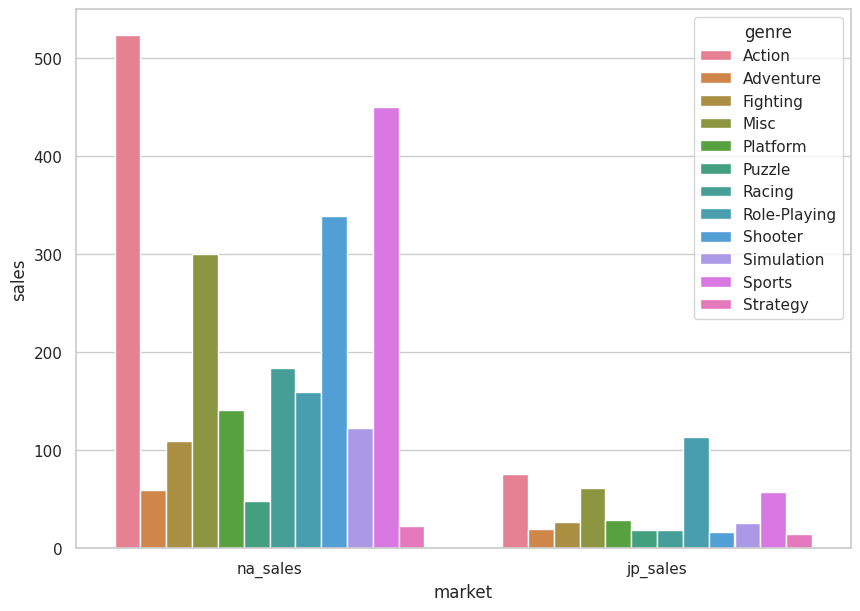

In [155]:
# Creamos un grafico de barras del df genre_sales
plt.figure(figsize=(10, 7))
sns.barplot(data=genre_sales, x='market', y='sales', hue='genre')
plt.show()


En el análisis gráfico presentado, se evidencia una notable disparidad en las ventas entre Estados Unidos y Japón en los distintos géneros de videojuegos. En concreto, se observa que las ventas en Estados Unidos superan considerablemente a las de Japón en los 12 géneros examinados, con excepción de unos pocos casos en los cuales Japón registra un leve predominio. No obstante, en términos generales, la mayoría de los géneros exhiben una marcada superioridad en ventas por parte de Estados Unidos con respecto a Japón.

# 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [156]:
#Creamos un df llamado rating_sales y agrupamos las columnas rating y na_sales, jp_sale
rating_sales =  games.groupby('rating').agg({'na_sales': 'sum',
                                               'jp_sales':'sum'}).reset_index()
rating_sales

,rating,na_sales,jp_sales
0,E,896.81,127.81
1,E10+,271.83,28.41
2,EC,1.35,0.00
3,M,544.96,45.60
4,T,495.24,86.49


In [157]:
# Convertimos la columnas market en las ventas de na_sales y jp_sales, y en sales sus ventas numericas
rating_sales = pd.melt(rating_sales, id_vars = ['rating'], value_vars = ['na_sales', 'jp_sales'], var_name = 'market', value_name = 'sales')
rating_sales

,rating,market,sales
0,E,na_sales,896.81
1,E10+,na_sales,271.83
2,EC,na_sales,1.35
3,M,na_sales,544.96
4,T,na_sales,495.24
5,E,jp_sales,127.81
6,E10+,jp_sales,28.41
7,EC,jp_sales,0.00
8,M,jp_sales,45.60
9,T,jp_sales,86.49


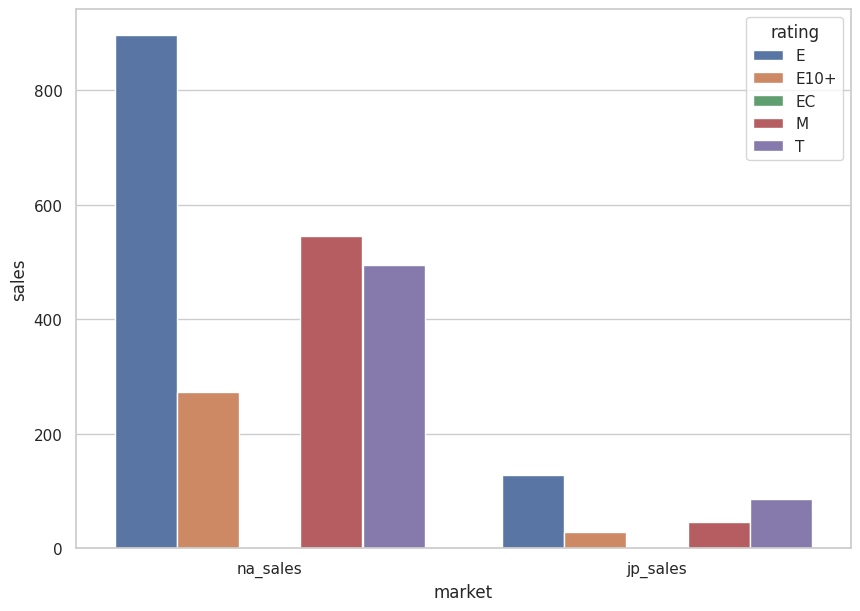

In [158]:
# Creamos un grafico de barras con el df rating_sales
plt.figure(figsize=(10, 7))
sns.barplot(data=rating_sales, x='market', y='sales', hue='rating')
plt.show()


En el análisis representado en el gráfico de barras correspondiente a las clasificaciones por rating, se destaca una notable diferencia en el porcentaje de clasificaciones entre Estados Unidos y Japón. Este fenómeno puede atribuirse a una mayor cantidad de videojuegos vendidos en Estados Unidos, o bien, a una mejor clasificación otorgada a cada juego. Sin embargo, independientemente de las razones subyacentes, se observa que en todas las cinco clasificaciones, a excepción de "EC" que permanece constante, Estados Unidos exhibe un porcentaje superior al de Japón. En consecuencia, se puede inferir que Estados Unidos ostenta una clasificación globalmente más favorable en comparación con Japón.

# Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

        — Cómo formulaste las hipótesis nula y alternativa.

        — Qué criterio utilizaste para probar las hipótesis y por qué.

# Hipotesis 1:

1. Formulación de las hipótesis nula y alternativa:

HO: Las calificaciones promedio de los usuarios en la plataforma Xbox One y PC son iguales.

H1: Las calificaciones promedio de los usuarios en la plataforma Xbox One y PC son diferentes.

2. Obtenemos la informacion que deceamos.

In [159]:
# Este código devuelve todos los valores únicos que están presentes en la columna 
df_game['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [160]:
# Estos fragmentos de código te permiten obtener las puntuaciones de los usuarios para los juegos en las plataformas Xbox One y PC
calificasion_XOne = df_game[df_game['platform'] == 'XOne']['user_score'].dropna()
calificasion_PC = df_game[df_game['platform'] == 'PC']['user_score'].dropna()

calificasion_XOne
calificasion_PC

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 770, dtype: float64

3. Definición del test y valor de significancia:

        -Utilizamos el nivel estándar de significancia de 0.05.

        -En nuestro caso, estamos interesados en comparar dos categorías (XOne vs PC) en relación con una variable que contiene los datos que necesitamos (User_score). Dado que desconocemos la desviación estándar de la población, lo más adecuado sería utilizar el t-test.


4. Aplicación del test, asegurándonos de cumplir con todos los aspectos teóricos.

In [161]:
# Este codigo realiza la prueva de hipotesis
alpha = 0.5
stat, p_value = ttest_ind(
    calificasion_XOne,
    calificasion_PC
)
print(f"""
      La calificasion promedio de profecionales para Xbox es: {calificasion_XOne.mean()}
      La calificasion promedio de profecionales para PC es: {calificasion_PC.mean()}
      
      t-statistic: {stat}
      p-value: {p_value}""")

if p_value < alpha:
    print('Rechasamos nuestra Hipotesis nula')
else:
    print('No Rechasamos nuestra Hipotesis nula')


      La calificasion promedio de profecionales para Xbox es: 6.521428571428572
      La calificasion promedio de profecionales para PC es: 7.062467532467533
      
      t-statistic: -4.368333815003015
      p-value: 1.3896435533548819e-05
Rechasamos nuestra Hipotesis nula


Con base en los resultados:

La calificación promedio de los usuarios de Xbox es aproximadamente 6.52.

La calificación promedio de los usuarios de PC es aproximadamente 7.06.

El test estafistico es aproximadamente -4.37.

El valor p es extremadamente pequeño (1.39e-05), lo que sugiere que es muy improbable que la diferencia observada entre las calificaciones promedio de Xbox y PC sea debido al azar.

Dado que el valor p es significativamente menor que el nivel de significancia (alpha), que suele ser 0.05, Rechazamos la hipótesis nula. Por lo tanto, hay evidencia suficiente para concluir que las 
calificaciones promedio de los usuarios de Xbox y PC son estadísticamente diferentes. En este caso, la hipótesis alternativa (H1) se sostiene, lo que implica que las calificaciones promedio de los usuarios de Xbox y PC son distintas.

# Hipotesis 2
1. Formulación de las hipótesis nula y alternativa:

HO: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


2. Obtenemos la informacion que deceamos.

In [162]:
# Este código devuelve todos los valores únicos que están presentes en la columna genre
df_game['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [163]:
# Estos fragmentos de código te permiten obtener las puntuaciones de los usuarios para los generos en las plataformas sport y action
genre_Sport = df_game[df_game['genre'] == 'Sports']['user_score'].dropna()
genre_Action = df_game[df_game['genre'] == 'Action']['user_score'].dropna()

3. Definición del test y valor de significancia:

        -Utilizamos el nivel estándar de significancia de 0.05.

        -Estamos interesados en comparar dos generos(Accion vs Deporte) en relación con una variable que contiene los datos que necesitamos (Genre). Dado que desconocemos la desviación estándar de la población, lo más adecuado sería utilizar el t-test.


4. Aplicación del test, asegurándonos de cumplir con todos los aspectos teóricos.

In [164]:
# Este codigo realiza la prueva de hipotesis
alpha = 0.5
stat, p_value = ttest_ind(
    genre_Sport,
    genre_Action
)
print(f"""
      La calificasion promedio de profecionales para Deportes es: {genre_Sport.mean()}
      La calificasion promedio de profecionales para Accion es: {genre_Action.mean()}
      
      t-statistic: {stat}
      p-value: {p_value}""")

if p_value < alpha:
    print('Rechasamos nuestra Hipotesis nula')
else:
    print('No Rechasamos nuestra hipotesis nula')


      La calificasion promedio de profecionales para Deportes es: 6.961196736174069
      La calificasion promedio de profecionales para Accion es: 7.054043715846995
      
      t-statistic: -1.6259419280500857
      p-value: 0.10406951359049141
Rechasamos nuestra Hipotesis nula


Con base en los resultados:

La calificación promedio de los usuarios en el género Deportes es aproximadamente 6.96.

La calificación promedio de los usuarios en el género Acción es aproximadamente 7.05.

El t-estadístico es -1.63 y el valor p es 0.104. 
Dado que el valor p es mayor que un nivel de significancia comúnmente elegido (como 0.05), no hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, no podemos concluir que las calificaciones promedio de los profesionales para los géneros de Acción y Deportes sean diferentes.

# Paso 6. 

        -Escribe una conclusión general

Durante el desarrollo del proyecto de la tienda en línea de videojuegos de alcance global, se llevaron a cabo una serie de tareas iniciales en la fase de programación. En primer lugar, se procedió a realizar las importaciones pertinentes y a configurar las rutas de archivos necesarias. Posteriormente, se procedió a la preparación de los datos, lo cual incluyó la estandarización de los nombres de las columnas mediante su conversión a minúsculas, así como la adecuación de los tipos de datos para facilitar su manipulación.

Una vez completada esta etapa, se realizó una exhaustiva revisión de los valores ausentes en el conjunto de datos. Para ello, se implementó un código que permitió calcular el porcentaje de valores faltantes en cada columna. Se observó que las columnas correspondientes a "Estados Unidos", "Japón" y "rating" presentaban un porcentaje de ausencia de datos superior al 40% al 55%. En consecuencia, se determinó conservar dichos datos en su estado original, evitando así posibles complicaciones en las pruebas de hipótesis asociadas con la imputación de valores faltantes. Además, se procedió a identificar y reemplazar los valores "tbd" por valores "NaN" como parte de este proceso.

En una fase posterior, se llevó a cabo el cálculo de las ventas totales y se creó una nueva columna que aglutinaba el total de ventas por país, con el fin de facilitar su manipulación en futuros análisis.

En el contexto del análisis de datos, se inició examinando los juegos lanzados en diferentes años, generando gráficos que evidenciaron un notable incremento en las ventas a partir del año 2000. Posteriormente, se exploraron las ventas por plataforma, destacando el significativo desempeño de dos plataformas en particular: PlayStation 2 y Wii. Cabe destacar que este análisis se centró en las cinco plataformas principales, con el propósito de optimizar la evaluación sin abordar todas las plataformas disponibles.

Continuando con el análisis, se identificaron las plataformas líderes en ventas mediante la utilización de gráficos de caja, lo cual requirió la eliminación de sesgos para garantizar una visión precisa de las plataformas y sus frecuencias. Asimismo, se evaluó la puntuación otorgada por los críticos a lo largo de los años, tomando como referencia la plataforma PlayStation 2. Además, se examinó la distribución general de los juegos por género, observando la existencia de géneros con mayor rentabilidad que otros, lo que permitió generalizar sobre las categorías con ventas más elevadas y más bajas.

En la fase posterior, en el Paso 4 del proceso, se procedió a la elaboración de un perfil individualizado para cada región de interés. Durante este proceso, se realizó un análisis detallado de las cinco plataformas principales, con el objetivo de comprender la variación en su participación de mercado en diferentes regiones geográficas.

Los hallazgos revelaron una disparidad significativa en las ventas entre Estados Unidos y Japón en todas las plataformas estudiadas. Este patrón de diferenciación en las cifras de ventas entre ambas regiones sugiere y confirma la variabilidad en la participación de mercado de una región a otra.

En el Paso 5 del análisis, llevamos a cabo pruebas de hipótesis para evaluar diversas comparaciones significativas. En primer lugar, se examinó si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC mostraban diferencias estadísticamente significativas. Los resultados indicaron que, de hecho, las calificaciones promedio de los usuarios para estas dos plataformas difieren de manera significativa.

En el segundo escenario de prueba de hipótesis, se evaluó si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes presentaban diferencias significativas. En este caso, los resultados respaldaron la hipótesis alternativa, lo que sugiere que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son efectivamente distintas entre sí.

En resumen, en el Paso 5 del análisis, se obtuvieron conclusiones que respaldan la existencia de diferencias significativas tanto en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC, como en las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.